# Bike Sharing Case Study

### Problem Statement
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

##### The company wants to know:
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands.

#### Objective:
- Build a model for the demand of shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features.


#### Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

### Importing and Understanding the data

In [2]:
bikes = pd.read_csv('day.csv')
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
#check null values
bikes.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [5]:
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
bikes.shape

(730, 16)

In [7]:
bikes.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [8]:
bikes['dteday'] = pd.to_datetime(bikes['dteday'],format= '%d-%m-%Y') 

In [9]:
# updating the datatype of the column dteday
bikes['dteday'] = bikes.dteday.astype('datetime64[ns]')

In [10]:
bikes['day_of_the_month']=pd. to_datetime(bikes['dteday']). dt. day

In [11]:
#dropping redundant variables
bikes=bikes.drop(['instant', 'dteday','casual','registered'],axis=1)

In [12]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day_of_the_month
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,2
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,3
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,4
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,5


In [13]:
bikes[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']]=bikes[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']].astype('category')

#### Identifying Numerical and Categorical variables

In [14]:
varlist=bikes.select_dtypes('category').columns.to_list()
varlist

['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

In [15]:
numlist=bikes.select_dtypes(['int64','float64']).columns.to_list()
numlist

['temp', 'atemp', 'hum', 'windspeed', 'cnt']

#### Replacing values for categorical variables

In [16]:
bikes['season'].value_counts()

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

In [17]:
bikes['season'] = bikes['season'].map({1:"spring", 2:"summer", 3:"fall", 4:"winter"})

In [18]:
bikes['mnth'].value_counts()

mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64

In [19]:
bikes['mnth'] = bikes['mnth'].map({1:"January", 2:"February", 3:"March", 4:"April", 5:"May", 6:"June", 7:"July", 8:"August", 9:"September", 10:"October", 11:"November", 12:"December"})

In [20]:
bikes['weekday'].value_counts()

weekday
0    105
1    105
6    105
2    104
4    104
5    104
3    103
Name: count, dtype: int64

In [21]:
bikes['weekday'] = bikes['weekday'].map({0:"Sunday", 1:"Monday", 2:"Tuesday", 3:"Wednesday", 4:"Thursday", 5:"Friday", 6:"Saturday"})

In [22]:
bikes['weathersit'].value_counts()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

In [23]:
bikes['weathersit'] = bikes['weathersit'].map({1:"Clear / Partly cloudy", 2:"Mist & Cloudy", 3:" Light Snow / Rain & Thunderstorm "})

In [24]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day_of_the_month
0,spring,0,January,0,Saturday,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985,1
1,spring,0,January,0,Sunday,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801,2
2,spring,0,January,0,Monday,1,Clear / Partly cloudy,8.050924,9.47025,43.7273,16.636703,1349,3
3,spring,0,January,0,Tuesday,1,Clear / Partly cloudy,8.200000,10.60610,59.0435,10.739832,1562,4
4,spring,0,January,0,Wednesday,1,Clear / Partly cloudy,9.305237,11.46350,43.6957,12.522300,1600,5


### Exploratory Data Analysis

#### Numeric Variables

Based on the below pairplots the observations are, 
- The relationship between numeric variables indicate we can do linear regression with the given dataset.
- There is a positive correlation between count of bikes and temperature.
- Temperature looks like a strong predictor of count of bikes


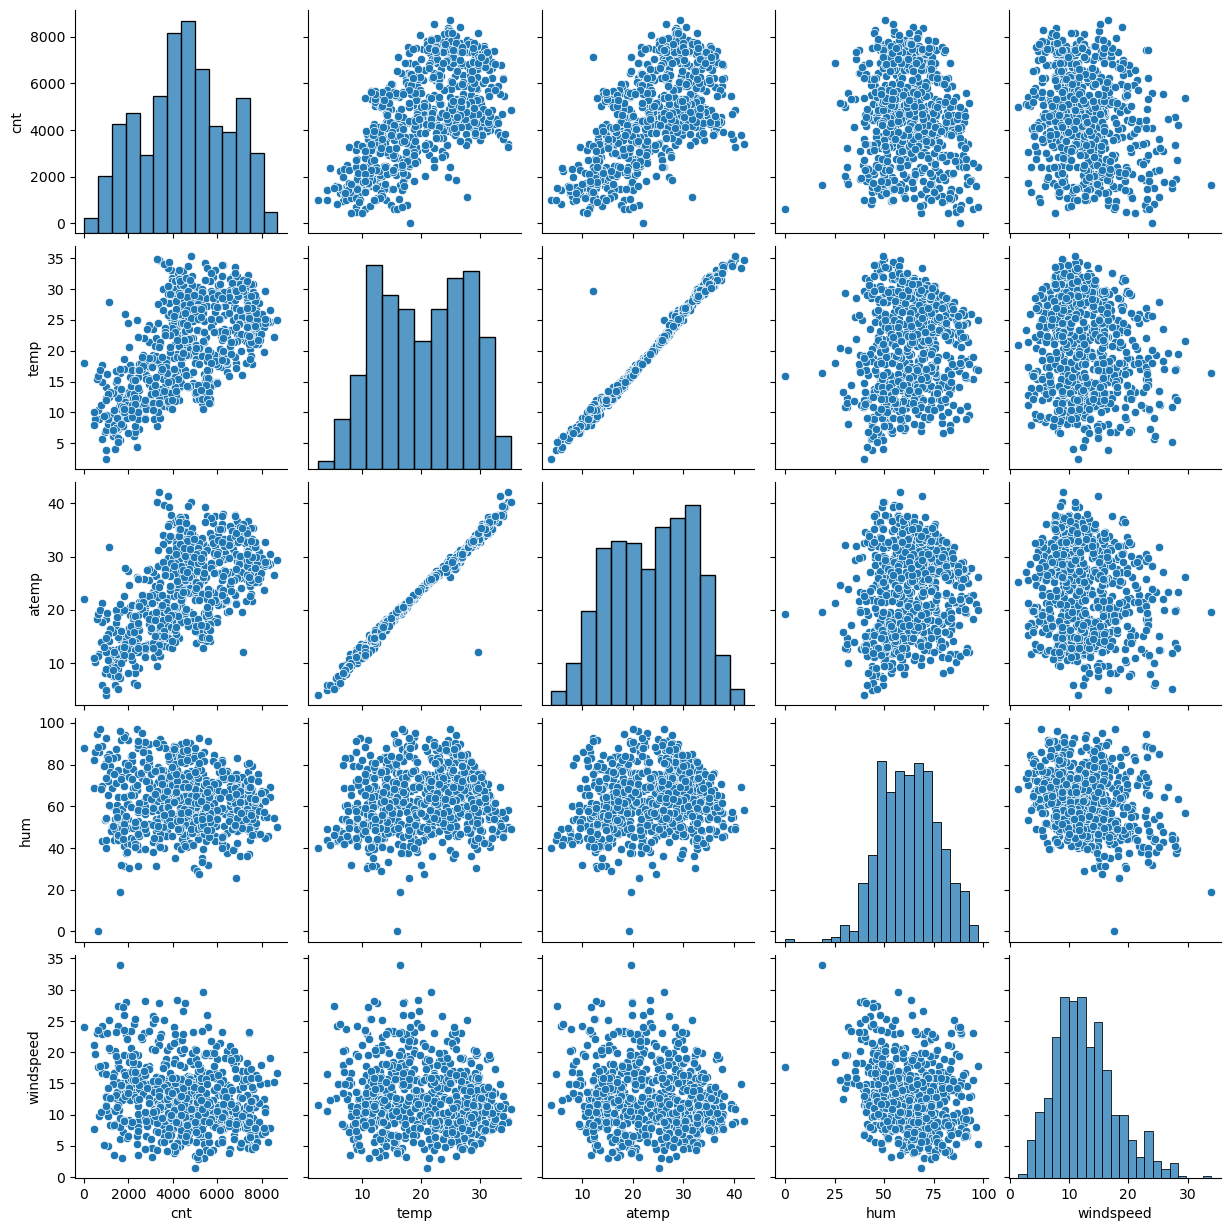

In [25]:
#Relationship between Numeric Variables
sns.pairplot(bikes[['cnt','temp', 'atemp', 'hum', 'windspeed']])

#### Categorical Variables

Based on the above box-plots the observations are, 
- The demand for rental bikes is high when the season is fall and during spring season the demand is very low compared to seasons summer and winter.
- The demand for rental bikes gradually increases from Jan to June hits peak during July and then gradually decreases from August to December.
- Whether the day is a holiday or not,  weekend or  weekday the demand doesn't get affected much by these factors.
- The demand for rental bikes is high when there is a clear weather and it is very low during bad weathers  (snow or rain).


<Axes: xlabel='weekday'>

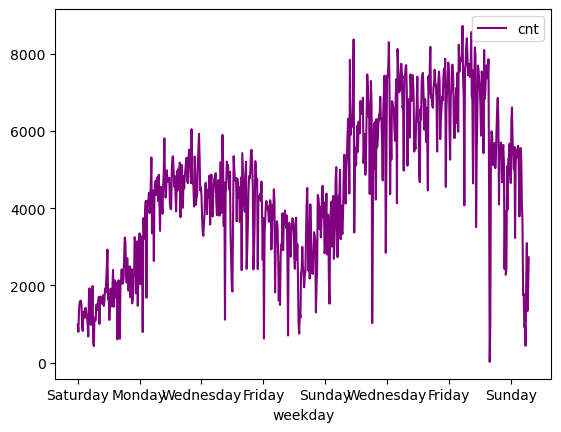

In [26]:
bikes.plot.line(x='weekday', y='cnt', color='purple')

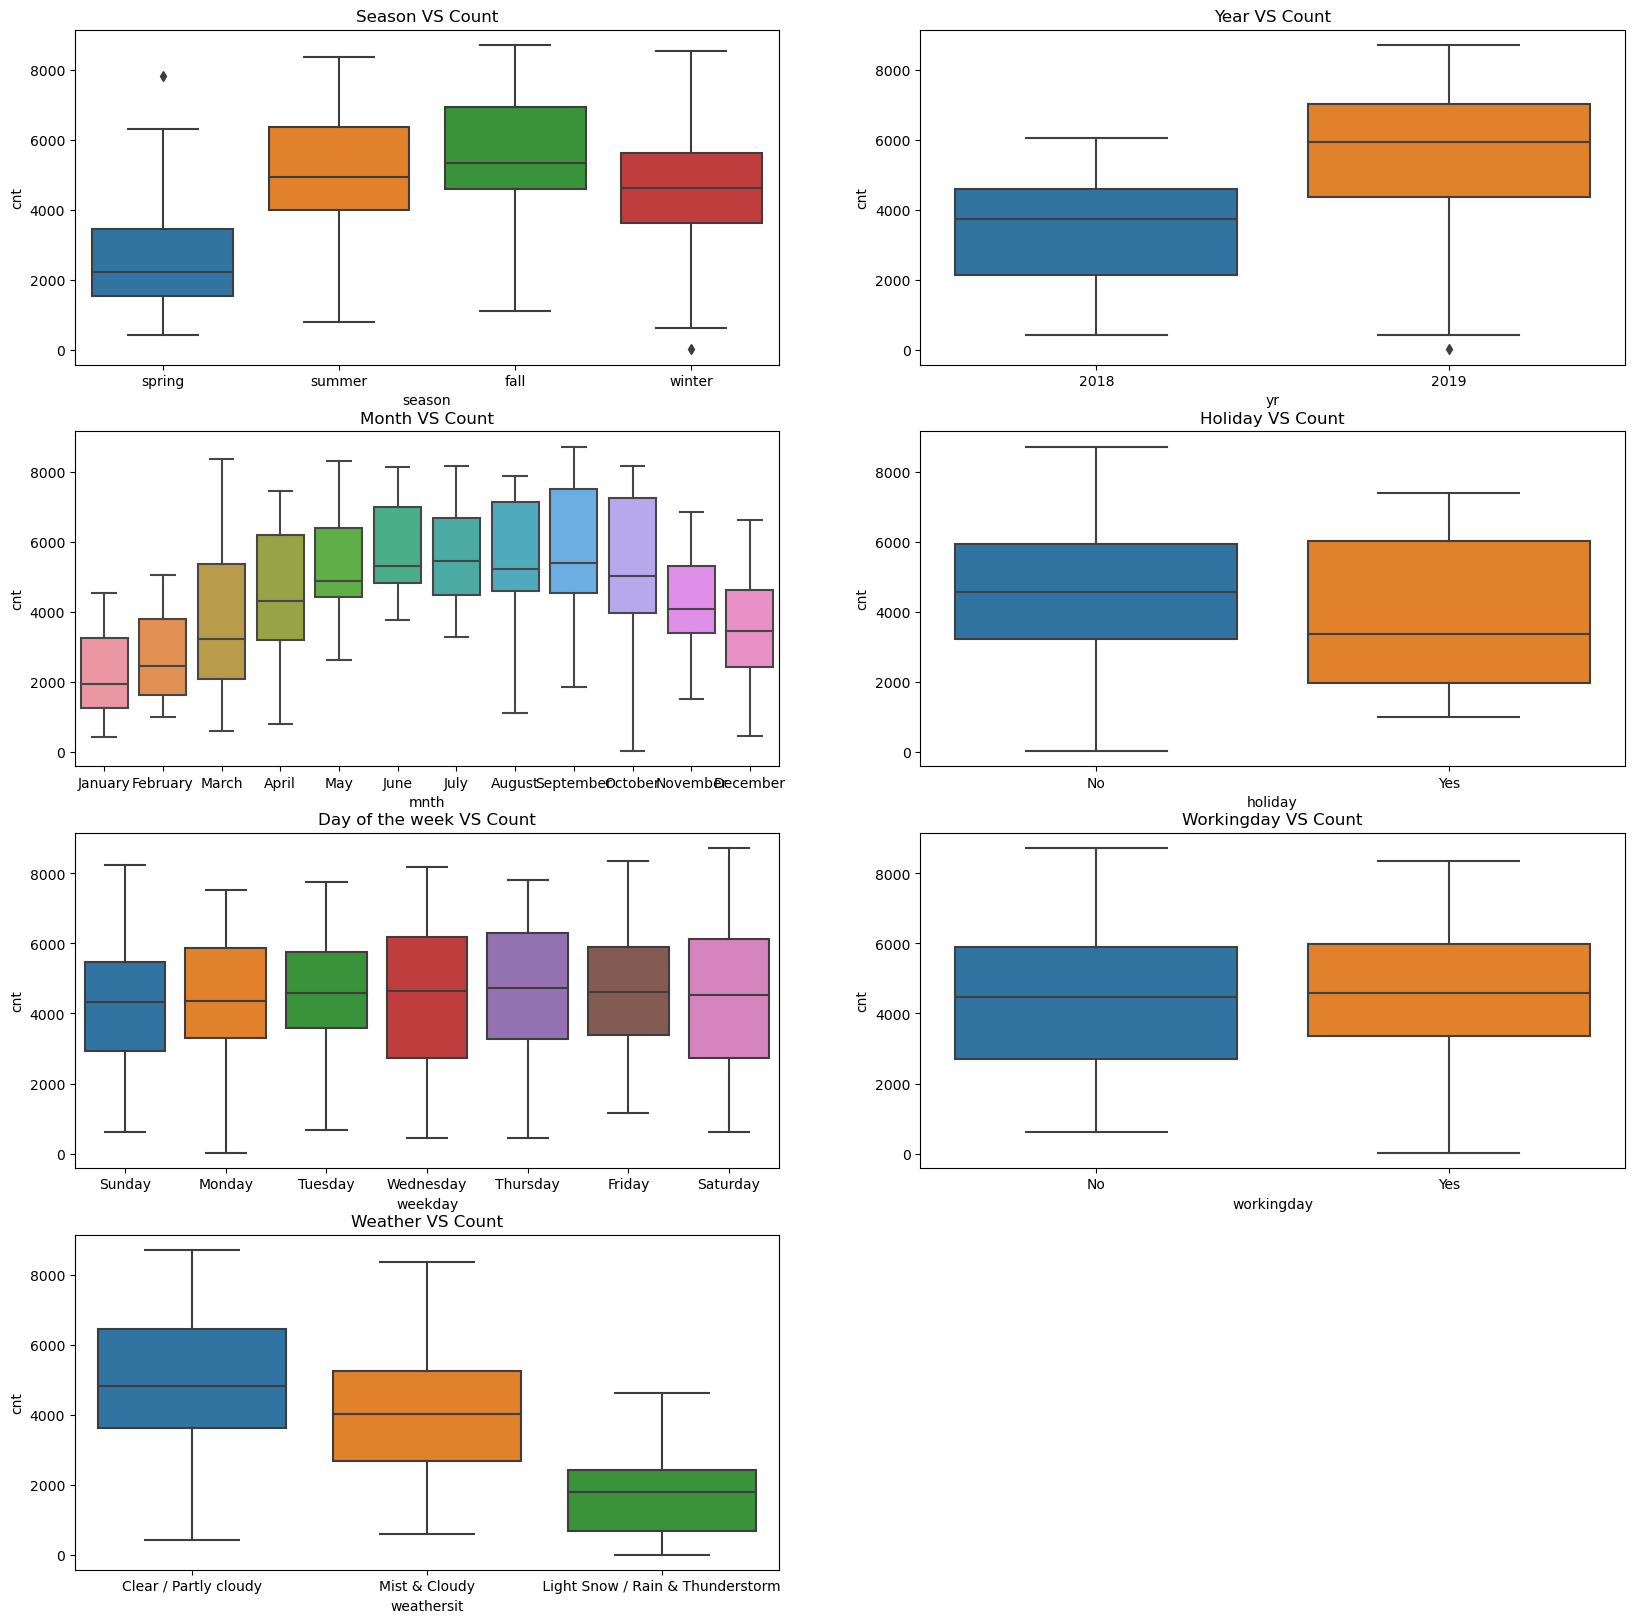

In [27]:
plt.figure(figsize=(20, 20))
plt.subplot(4,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikes)
plt.title('Season VS Count')
plt.subplot(4,2,2)
ax = sns.boxplot(x = 'yr', y = 'cnt', data = bikes)
ax.set_xticklabels(["2018","2019"]) 
plt.title('Year VS Count')
plt.subplot(4,2,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikes)
plt.title('Month VS Count')
plt.subplot(4,2,4)
ax = sns.boxplot(x = 'holiday', y = 'cnt', data = bikes)
ax.set_xticklabels(["No","Yes"]) 
plt.title('Holiday VS Count')
plt.subplot(4,2,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikes)
plt.title('Day of the week VS Count')
plt.subplot(4,2,6)
ax = sns.boxplot(x = 'workingday', y = 'cnt', data = bikes)
ax.set_xticklabels(["No","Yes"])
plt.title('Workingday VS Count')
plt.subplot(4,2,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikes)
plt.title('Weather VS Count')
plt.show()

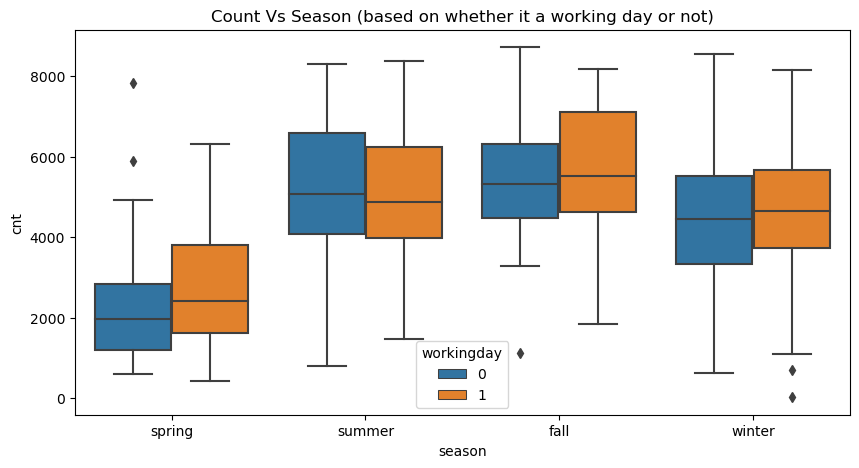

In [28]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'season', y = 'cnt', hue = 'workingday', data = bikes)
plt.title('Count Vs Season (based on whether it a working day or not)')
plt.show()

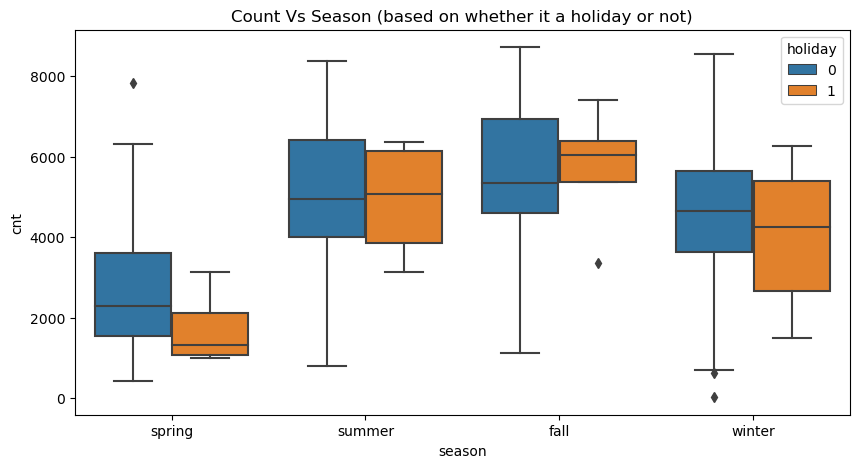

In [29]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'season', y = 'cnt', hue = 'holiday', data = bikes)
plt.title('Count Vs Season (based on whether it a holiday or not)')
plt.show()

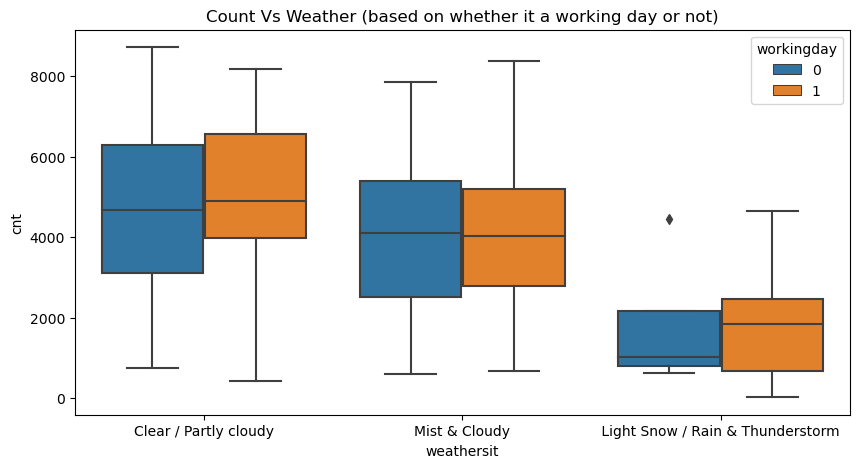

In [30]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'weathersit', y = 'cnt', hue = 'workingday', data = bikes)
plt.title('Count Vs Weather (based on whether it a working day or not)')
plt.show()

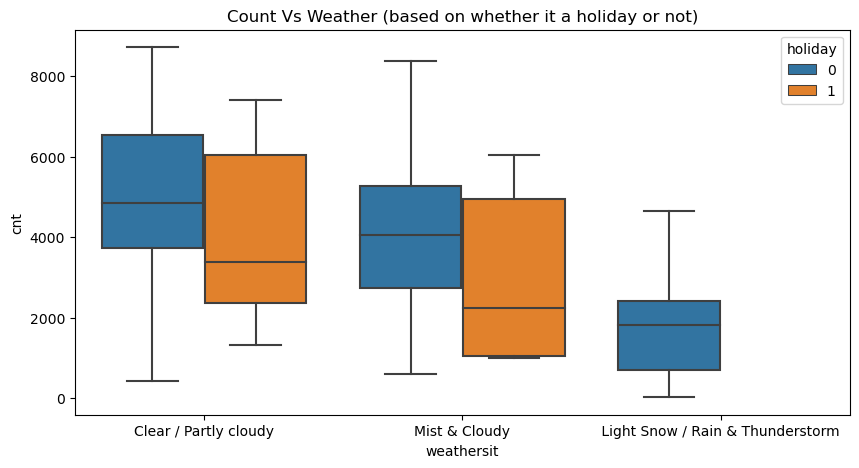

In [31]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'weathersit', y = 'cnt', hue = 'holiday', data = bikes)
plt.title('Count Vs Weather (based on whether it a holiday or not)')
plt.show()

#### Correlation Matrix
Based on the below boxplots the observations are, 
 - Temperature is positively correlated with count of bikes.
 - Humidity and Windspeed are negatively correlated with count of bikes.
 - Temp and atemp is highly correlated (nearly 1) so it is better to keep one variable and drop another.


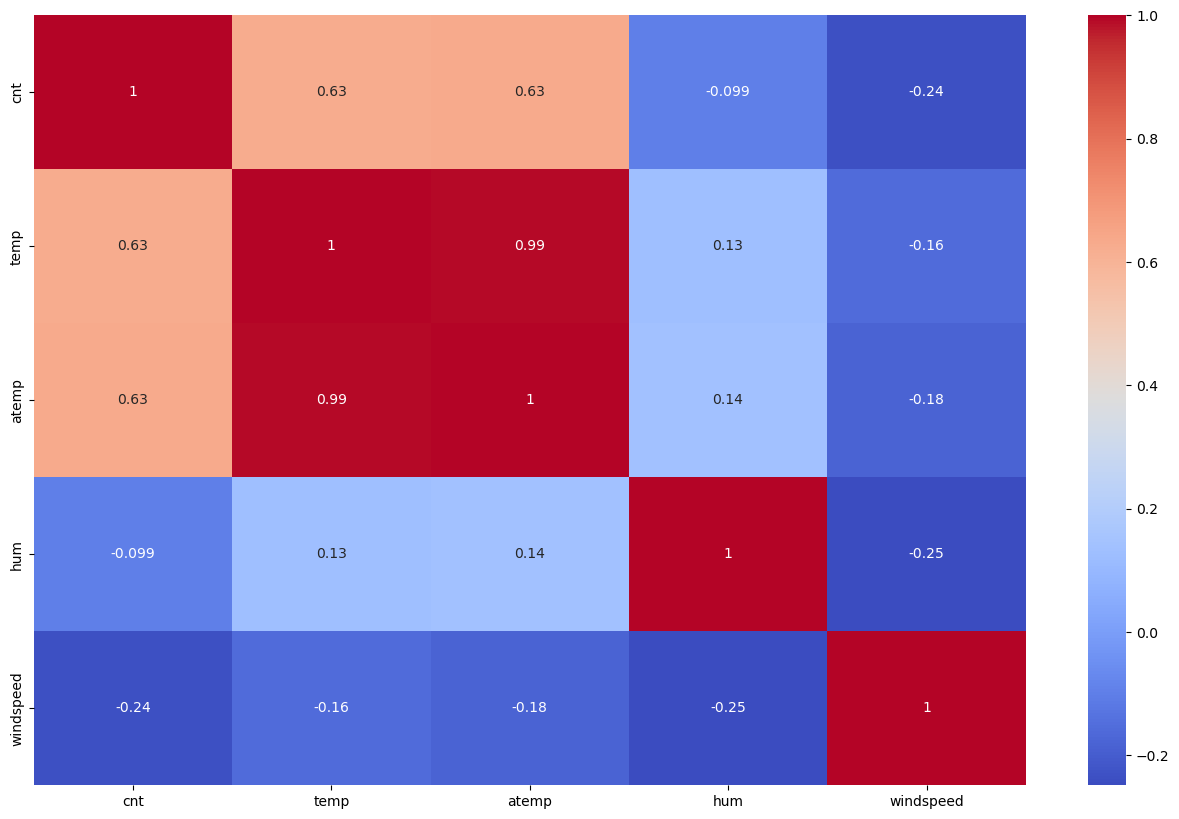

In [32]:
plt.figure(figsize = (16, 10))
sns.heatmap(bikes[['cnt','temp', 'atemp', 'hum', 'windspeed']].corr(), annot = True, cmap="coolwarm")
plt.show()

In [33]:
#dropping the variable atemp
bikes=bikes.drop(['atemp'],axis=1)
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,day_of_the_month
0,spring,0,January,0,Saturday,0,Mist & Cloudy,14.110847,80.5833,10.749882,985,1
1,spring,0,January,0,Sunday,0,Mist & Cloudy,14.902598,69.6087,16.652113,801,2
2,spring,0,January,0,Monday,1,Clear / Partly cloudy,8.050924,43.7273,16.636703,1349,3
3,spring,0,January,0,Tuesday,1,Clear / Partly cloudy,8.200000,59.0435,10.739832,1562,4
4,spring,0,January,0,Wednesday,1,Clear / Partly cloudy,9.305237,43.6957,12.522300,1600,5


## Data Preparation for the Model

In [34]:
#Categorical variables
varlist

['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

In [35]:
bikes['season'].value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [36]:
Season=pd.get_dummies(bikes['season'],dtype=int,drop_first=True)
Season.head()


,summer,fall,winter
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [37]:
bikes=pd.concat([bikes, Season], axis=1)
bikes=bikes.drop('season',axis=1)
bikes.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,day_of_the_month,summer,fall,winter
0,0,January,0,Saturday,0,Mist & Cloudy,14.110847,80.5833,10.749882,985,1,0,0,0
1,0,January,0,Sunday,0,Mist & Cloudy,14.902598,69.6087,16.652113,801,2,0,0,0
2,0,January,0,Monday,1,Clear / Partly cloudy,8.050924,43.7273,16.636703,1349,3,0,0,0
3,0,January,0,Tuesday,1,Clear / Partly cloudy,8.200000,59.0435,10.739832,1562,4,0,0,0
4,0,January,0,Wednesday,1,Clear / Partly cloudy,9.305237,43.6957,12.522300,1600,5,0,0,0


In [38]:
Month=pd.get_dummies(bikes['mnth'],dtype=int,drop_first=True)
Month.head()

,February,March,April,May,June,July,August,September,October,November,December
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


In [39]:
bikes=pd.concat([bikes, Month], axis=1)
bikes=bikes.drop('mnth',axis=1)
bikes.head()

,yr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,day_of_the_month,...,March,April,May,June,July,August,September,October,November,December
0,0,0,Saturday,0,Mist & Cloudy,14.110847,80.5833,10.749882,985,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,Sunday,0,Mist & Cloudy,14.902598,69.6087,16.652113,801,2,...,0,0,0,0,0,0,0,0,0,0
2,0,0,Monday,1,Clear / Partly cloudy,8.050924,43.7273,16.636703,1349,3,...,0,0,0,0,0,0,0,0,0,0
3,0,0,Tuesday,1,Clear / Partly cloudy,8.200000,59.0435,10.739832,1562,4,...,0,0,0,0,0,0,0,0,0,0
4,0,0,Wednesday,1,Clear / Partly cloudy,9.305237,43.6957,12.522300,1600,5,...,0,0,0,0,0,0,0,0,0,0


In [40]:
Weekday=pd.get_dummies(bikes['weekday'],dtype=int,drop_first=True)
Weekday.head()

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
0,0,0,0,0,0,1
1,0,0,0,0,0,0
2,1,0,0,0,0,0
3,0,1,0,0,0,0
4,0,0,1,0,0,0


In [41]:
bikes=pd.concat([bikes, Weekday], axis=1)
bikes=bikes.drop('weekday',axis=1)
bikes.head()

,yr,holiday,workingday,weathersit,temp,hum,windspeed,cnt,day_of_the_month,summer,...,September,October,November,December,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
0,0,0,0,Mist & Cloudy,14.110847,80.5833,10.749882,985,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,Mist & Cloudy,14.902598,69.6087,16.652113,801,2,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,Clear / Partly cloudy,8.050924,43.7273,16.636703,1349,3,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,Clear / Partly cloudy,8.200000,59.0435,10.739832,1562,4,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,Clear / Partly cloudy,9.305237,43.6957,12.522300,1600,5,0,...,0,0,0,0,0,0,1,0,0,0


In [42]:
Weather=pd.get_dummies(bikes['weathersit'],dtype=int,drop_first=True)
Weather.head()

,Mist & Cloudy,Light Snow / Rain & Thunderstorm
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


- Clear / Partly cloudy : 00
- Mist & Cloudy : 10
- Light Snow / Rain & Thunderstorm : 01

In [43]:
bikes=pd.concat([bikes, Weather], axis=1)
bikes=bikes.drop('weathersit',axis=1)
bikes.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,day_of_the_month,summer,fall,...,November,December,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Mist & Cloudy,Light Snow / Rain & Thunderstorm
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14.902598,69.6087,16.652113,801,2,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,3,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,4,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,5,0,0,...,0,0,0,0,1,0,0,0,0,0


In [44]:
bikes.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'day_of_the_month', 'summer', 'fall', 'winter', 'February', 'March',
       'April', 'May', 'June', 'July', 'August', 'September', 'October',
       'November', 'December', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday', 'Saturday', 'Mist & Cloudy',
       ' Light Snow / Rain & Thunderstorm '],
      dtype='object')

In [45]:
bikes[['yr','holiday','workingday']]=bikes[['yr','holiday','workingday']].astype('int32')
bikes.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,day_of_the_month,summer,fall,...,November,December,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Mist & Cloudy,Light Snow / Rain & Thunderstorm
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,62.765175,12.763620,4508.006849,15.720548,0.252055,0.257534,...,0.082192,0.084932,0.143836,0.142466,0.141096,0.142466,0.142466,0.143836,0.336986,0.028767
std,0.500343,0.167266,0.465405,7.506729,14.237589,5.195841,1936.011647,8.802278,0.434490,0.437576,...,0.274845,0.278971,0.351164,0.349767,0.348359,0.349767,0.349767,0.351164,0.473004,0.167266
min,0.000000,0.000000,0.000000,2.424346,0.000000,1.500244,22.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,52.000000,9.041650,3169.750000,8.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,62.625000,12.125325,4548.500000,16.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,72.989575,15.625589,5966.000000,23.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,97.250000,34.000021,8714.000000,31.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Splitting the data to Train & Test data set 

In [46]:
dftrain, dftest=train_test_split(bikes, train_size=0.7, random_state=100)

In [47]:
dftrain.shape

(510, 30)

In [48]:
dftest.shape

(220, 30)

In [49]:
dftrain.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,day_of_the_month,summer,fall,...,November,December,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Mist & Cloudy,Light Snow / Rain & Thunderstorm
576,1,0,1,29.246653,70.4167,11.083475,7216,31,0,1,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16.980847,62.1250,10.792293,4066,3,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,10.489153,48.3333,23.500518,1796,30,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,15.443347,48.9583,8.708325,4220,28,1,0,...,0,0,0,0,0,0,0,1,1,0
111,0,0,1,13.803347,72.9583,14.707907,1683,22,1,0,...,0,0,0,0,0,0,1,0,1,0


In [50]:
dftest.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,day_of_the_month,summer,fall,...,November,December,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Mist & Cloudy,Light Snow / Rain & Thunderstorm
184,0,1,0,29.793347,63.7917,5.459106,6043,4,0,1,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,32.082500,59.2083,7.625404,6211,20,1,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,1,19.270000,81.2917,13.250121,2659,27,0,0,...,0,0,0,0,0,1,0,0,1,0
221,0,0,1,31.433347,42.4167,13.417286,4780,10,0,1,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,29.315000,30.5000,19.583229,4968,2,1,0,...,0,0,0,0,0,1,0,0,0,0


### Rescalling variables of the dataset using Min Max scalling

In [51]:
num_vars = ['temp', 'hum', 'windspeed', 'cnt', 'day_of_the_month']
dftrain[num_vars].head()

,temp,hum,windspeed,cnt,day_of_the_month
576,29.246653,70.4167,11.083475,7216,31
426,16.980847,62.1250,10.792293,4066,3
728,10.489153,48.3333,23.500518,1796,30
482,15.443347,48.9583,8.708325,4220,28
111,13.803347,72.9583,14.707907,1683,22


In [52]:
scaler=MinMaxScaler()
dftrain[num_vars]=scaler.fit_transform(dftrain[num_vars])
dftrain[num_vars].head()

,temp,hum,windspeed,cnt,day_of_the_month
576,0.815169,0.725633,0.264686,0.827658,1.000000
426,0.442393,0.640189,0.255342,0.465255,0.066667
728,0.245101,0.498067,0.663106,0.204096,0.966667
482,0.395666,0.504508,0.188475,0.482973,0.900000
111,0.345824,0.751824,0.380981,0.191095,0.700000


In [53]:
dftrain[num_vars].describe()

,temp,hum,windspeed,cnt,day_of_the_month
count,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.650480,0.320883,0.513499,0.486405
std,0.225858,0.145846,0.169803,0.224421,0.297061
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.538643,0.199179,0.356420,0.233333
50%,0.542596,0.653714,0.296763,0.518638,0.500000
75%,0.735215,0.754830,0.414447,0.684710,0.733333
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [54]:
dftrain.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,day_of_the_month,summer,fall,...,November,December,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Mist & Cloudy,Light Snow / Rain & Thunderstorm
576,1,0,1,0.815169,0.725633,0.264686,0.827658,1.000000,0,1,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,0.066667,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,0.966667,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0.900000,1,0,...,0,0,0,0,0,0,0,1,1,0
111,0,0,1,0.345824,0.751824,0.380981,0.191095,0.700000,1,0,...,0,0,0,0,0,0,1,0,1,0


#### Dividing into X and Y sets for the model building

In [55]:
y_train = dftrain.pop('cnt')
X_train = dftrain

In [56]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [57]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,day_of_the_month,summer,fall,winter,...,November,December,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Mist & Cloudy,Light Snow / Rain & Thunderstorm
576,1,0,1,0.815169,0.725633,0.264686,1.000000,0,1,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.066667,0,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,0.245101,0.498067,0.663106,0.966667,0,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.900000,1,0,0,...,0,0,0,0,0,0,0,1,1,0
111,0,0,1,0.345824,0.751824,0.380981,0.700000,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [58]:
X_train.shape

(510, 29)

### Model Selection using RFE

In [59]:
# Running RFE with the output number of the variable equal to 17 (60% of total variables {30 columns} )
lm = LinearRegression(
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=17)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [60]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('day_of_the_month', False, 11),
 ('summer', True, 1),
 ('fall', True, 1),
 ('winter', True, 1),
 ('February', False, 4),
 ('March', True, 1),
 ('April', False, 2),
 ('May', True, 1),
 ('June', False, 3),
 ('July', False, 5),
 ('August', True, 1),
 ('September', True, 1),
 ('October', True, 1),
 ('November', False, 6),
 ('December', False, 7),
 ('Monday', False, 8),
 ('Tuesday', False, 9),
 ('Wednesday', False, 12),
 ('Thursday', False, 13),
 ('Friday', False, 10),
 ('Saturday', True, 1),
 ('Mist & Cloudy', True, 1),
 (' Light Snow / Rain & Thunderstorm ', True, 1)]

In [61]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'summer',
       'fall', 'winter', 'March', 'May', 'August', 'September', 'October',
       'Saturday', 'Mist & Cloudy', ' Light Snow / Rain & Thunderstorm '],
      dtype='object')

In [62]:
X_train.columns[~rfe.support_]

Index(['day_of_the_month', 'February', 'April', 'June', 'July', 'November',
       'December', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'],
      dtype='object')

## Building Models

### Model (using all data set)

In [63]:
X_train_all=X_train
X_train_all.head()

,yr,holiday,workingday,temp,hum,windspeed,day_of_the_month,summer,fall,winter,...,November,December,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Mist & Cloudy,Light Snow / Rain & Thunderstorm
576,1,0,1,0.815169,0.725633,0.264686,1.000000,0,1,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.066667,0,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,0.245101,0.498067,0.663106,0.966667,0,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.900000,1,0,0,...,0,0,0,0,0,0,0,1,1,0
111,0,0,1,0.345824,0.751824,0.380981,0.700000,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [64]:
X_train_all_sm=sm.add_constant(X_train_all)
                                   
X_train_all_sm.head()

,const,yr,holiday,workingday,temp,hum,windspeed,day_of_the_month,summer,fall,...,November,December,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Mist & Cloudy,Light Snow / Rain & Thunderstorm
576,1.0,1,0,1,0.815169,0.725633,0.264686,1.000000,0,1,...,0,0,0,1,0,0,0,0,0,0
426,1.0,1,0,0,0.442393,0.640189,0.255342,0.066667,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1.0,1,0,0,0.245101,0.498067,0.663106,0.966667,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1.0,1,0,0,0.395666,0.504508,0.188475,0.900000,1,0,...,0,0,0,0,0,0,0,1,1,0
111,1.0,0,0,1,0.345824,0.751824,0.380981,0.700000,1,0,...,0,0,0,0,0,0,1,0,1,0


In [65]:
lr_all = sm.OLS(y_train, X_train_all_sm)
lr_model_all=lr_all.fit()
lr_model_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.36
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          2.83e-180
Time:                        12:57:43   Log-Likelihood:                 527.12
No. Observations:                 510   AIC:                            -996.2
Df Residuals:                     481   BIC:                            -873.4
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.1783      0.031      5.784      0.000       0.118       0.239
yr                                     0.2325      0.008     28.797      0.000       0.217       0.248
holiday                               -0.0423      0.024     -1.788      0.074      -0.089       0.004
workingday                             0.0440      0.009      4.689      0.000       0.026       0.062
temp                                   0.4449      0.046      9.608      0.000       0.354       0.536
hum                                   -0.1504      0.039     -3.889      0.000      -0.226      -0.074
windspeed                             -0.1856      0.026     -7.201      0.000      -0.236      -0.135
day_of_the_month                      -0.0056      0.013     -0.414      0.679      -0.032       0.021
summer                                 0.0887      0.024      3.739      0.000       0.042       0.135
fall                                   0.0456      0.030      1.517      0.130      -0.013       0.105
winter                                 0.1524      0.026      5.864      0.000       0.101       0.203
February                               0.0306      0.021      1.482      0.139      -0.010       0.071
March                                  0.0643      0.022      2.870      0.004       0.020       0.108
April                                  0.0625      0.034      1.857      0.064      -0.004       0.129
May                                    0.0871      0.036      2.401      0.017       0.016       0.158
June                                   0.0674      0.039      1.736      0.083      -0.009       0.144
July                                   0.0289      0.044      0.659      0.510      -0.057       0.115
August                                 0.0832      0.042      1.996      0.047       0.001       0.165
September                              0.1486      0.037      3.970      0.000       0.075       0.222
October                                0.0714      0.035      2.067      0.039       0.004       0.139
November                               0.0236      0.033      0.718      0.473      -0.041       0.088
December                               0.0189      0.027      0.712      0.477      -0.033       0.071
Monday                                -0.0098      0.010     -1.010      0.313      -0.029       0.009
Tuesday                               -0.0069      0.011     -0.620      0.536      -0.029       0.015
Wednesday                              0.0055      0.011      0.524      0.600      -0.015       0.026
Thursday                               0.0019      0.011      0.172      0.863      -0.020       0.023
Friday                                 0.0111      0.011      0.994      0.320      -0.011      

In [66]:
vif = pd.DataFrame()
vif['Features'] = X_train_all.columns
vif['VIF'] = [variance_inflation_factor(X_train_all.values, i) for i in range(X_train_all.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
24,Thursday,inf
1,holiday,inf
2,workingday,inf
23,Wednesday,inf
22,Tuesday,inf
21,Monday,inf
25,Friday,inf
3,temp,46.87
4,hum,22.07
8,fall,15.40


##### Based on the statistics of the above Model , observations are :
- R2 and Adjusted R2 scores of Model are 0.853 & 0.844 respectively.
- P value of some Predictor variables are high ( >0.05) which means they are insignificant.
- VIF values for most of the variables are very high some are even showing as infinity so it recommended to removes some predictor variables which are insignificant to arrive a best fit mode.

### Model 1 with variables selected via RFE

In [67]:
X_train1=X_train[col]
X_train1.head()

,yr,holiday,workingday,temp,hum,windspeed,summer,fall,winter,March,May,August,September,October,Saturday,Mist & Cloudy,Light Snow / Rain & Thunderstorm
576,1,0,1,0.815169,0.725633,0.264686,0,1,0,0,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0,0,0,1,0,0,0,0,1,1,0
728,1,0,0,0.245101,0.498067,0.663106,0,0,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,1,0,0,0,0,0,0,0,1,1,0
111,0,0,1,0.345824,0.751824,0.380981,1,0,0,0,0,0,0,0,0,1,0


In [68]:
X_train_sm=sm.add_constant(X_train1)
                                   
X_train_sm.head()

,const,yr,holiday,workingday,temp,hum,windspeed,summer,fall,winter,March,May,August,September,October,Saturday,Mist & Cloudy,Light Snow / Rain & Thunderstorm
576,1.0,1,0,1,0.815169,0.725633,0.264686,0,1,0,0,0,0,0,0,0,0,0
426,1.0,1,0,0,0.442393,0.640189,0.255342,0,0,0,1,0,0,0,0,1,1,0
728,1.0,1,0,0,0.245101,0.498067,0.663106,0,0,0,0,0,0,0,0,0,0,0
482,1.0,1,0,0,0.395666,0.504508,0.188475,1,0,0,0,0,0,0,0,1,1,0
111,1.0,0,0,1,0.345824,0.751824,0.380981,1,0,0,0,0,0,0,0,0,1,0


In [69]:
lr_1 = sm.OLS(y_train, X_train_sm)
lr_model_1=lr_1.fit()
lr_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     163.8
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          5.55e-190
Time:                        12:57:44   Log-Likelihood:                 522.40
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     492   BIC:                            -932.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.1944      0.029      6.697      0.000       0.137       0.251
yr                                     0.2309      0.008     28.903      0.000       0.215       0.247
holiday                               -0.0513      0.027     -1.912      0.057      -0.104       0.001
workingday                             0.0433      0.012      3.766      0.000       0.021       0.066
temp                                   0.4845      0.034     14.251      0.000       0.418       0.551
hum                                   -0.1685      0.038     -4.492      0.000      -0.242      -0.095
windspeed                             -0.1825      0.025     -7.210      0.000      -0.232      -0.133
summer                                 0.1163      0.015      7.615      0.000       0.086       0.146
fall                                   0.0435      0.023      1.920      0.055      -0.001       0.088
winter                                 0.1524      0.014     10.916      0.000       0.125       0.180
March                                  0.0299      0.015      2.059      0.040       0.001       0.058
May                                    0.0280      0.018      1.592      0.112      -0.007       0.063
August                                 0.0476      0.017      2.759      0.006       0.014       0.081
September                              0.1177      0.017      6.908      0.000       0.084       0.151
October                                0.0435      0.017      2.505      0.013       0.009       0.078
Saturday                               0.0526      0.014      3.630      0.000       0.024       0.081
Mist & Cloudy                         -0.0578      0.010     -5.594      0.000      -0.078      -0.037
 Light Snow / Rain & Thunderstorm     -0.2513      0.026     -9.611      0.000      -0.303      -0.200
==============================================================================
Omnibus:                       81.952   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              220.050
Skew:                          -0.792   Prob(JB):                     1.65e-48
Kurtosis:                       5.801   Cond. No.                         21.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
vif = pd.DataFrame()
vif['Features'] = X_train1.columns
vif['VIF'] = [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,24.83
4,hum,17.58
7,fall,8.80
2,workingday,5.10
5,windspeed,4.00
6,summer,3.75
8,winter,3.12
15,Mist & Cloudy,2.15
0,yr,2.05
14,Saturday,1.92


##### Based on the statistics of Model 1 the observations are :
- R2 and Adjusted R2 scores of Model 1 are 0.850 & 0.845 respectively which is very good but need some refinenments
- P value of May month is high 0.112 ( > 0.05) and so it is recommended to remove it.

### Model 2 (dropping May month from Model 1)

In [71]:
X_train2=X_train1.drop('May',axis=1)
X_train2.head()

,yr,holiday,workingday,temp,hum,windspeed,summer,fall,winter,March,August,September,October,Saturday,Mist & Cloudy,Light Snow / Rain & Thunderstorm
576,1,0,1,0.815169,0.725633,0.264686,0,1,0,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0,0,0,1,0,0,0,1,1,0
728,1,0,0,0.245101,0.498067,0.663106,0,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,1,0,0,0,0,0,0,1,1,0
111,0,0,1,0.345824,0.751824,0.380981,1,0,0,0,0,0,0,0,1,0


In [72]:
X_train_sm=sm.add_constant(X_train2)
X_train_sm.head()

,const,yr,holiday,workingday,temp,hum,windspeed,summer,fall,winter,March,August,September,October,Saturday,Mist & Cloudy,Light Snow / Rain & Thunderstorm
576,1.0,1,0,1,0.815169,0.725633,0.264686,0,1,0,0,0,0,0,0,0,0
426,1.0,1,0,0,0.442393,0.640189,0.255342,0,0,0,1,0,0,0,1,1,0
728,1.0,1,0,0,0.245101,0.498067,0.663106,0,0,0,0,0,0,0,0,0,0
482,1.0,1,0,0,0.395666,0.504508,0.188475,1,0,0,0,0,0,0,1,1,0
111,1.0,0,0,1,0.345824,0.751824,0.380981,1,0,0,0,0,0,0,0,1,0


In [73]:
lr_2 = sm.OLS(y_train, X_train_sm)
lr_model_2=lr_2.fit()
lr_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     173.3
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          1.46e-190
Time:                        12:57:44   Log-Likelihood:                 521.09
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     493   BIC:                            -936.2
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.1892      0.029      6.549      0.000       0.132       0.246
yr                                     0.2302      0.008     28.815      0.000       0.215       0.246
holiday                               -0.0523      0.027     -1.945      0.052      -0.105       0.001
workingday                             0.0436      0.012      3.789      0.000       0.021       0.066
temp                                   0.4940      0.034     14.737      0.000       0.428       0.560
hum                                   -0.1609      0.037     -4.318      0.000      -0.234      -0.088
windspeed                             -0.1844      0.025     -7.279      0.000      -0.234      -0.135
summer                                 0.1221      0.015      8.229      0.000       0.093       0.151
fall                                   0.0372      0.022      1.664      0.097      -0.007       0.081
winter                                 0.1496      0.014     10.785      0.000       0.122       0.177
March                                  0.0255      0.014      1.789      0.074      -0.003       0.054
August                                 0.0472      0.017      2.730      0.007       0.013       0.081
September                              0.1173      0.017      6.870      0.000       0.084       0.151
October                                0.0421      0.017      2.423      0.016       0.008       0.076
Saturday                               0.0522      0.014      3.600      0.000       0.024       0.081
Mist & Cloudy                         -0.0580      0.010     -5.605      0.000      -0.078      -0.038
 Light Snow / Rain & Thunderstorm     -0.2533      0.026     -9.685      0.000      -0.305      -0.202
==============================================================================
Omnibus:                       79.154   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.450
Skew:                          -0.786   Prob(JB):                     2.97e-44
Kurtosis:                       5.639   Cond. No.                         21.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
vif = pd.DataFrame()
vif['Features'] = X_train2.columns
vif['VIF'] = [variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,24.20
4,hum,17.51
7,fall,8.53
2,workingday,5.09
5,windspeed,3.94
6,summer,3.54
8,winter,3.06
14,Mist & Cloudy,2.15
0,yr,2.04
13,Saturday,1.92


##### Based on the statistics of Model 2 the observations are :
- R2 and Adjusted R2 scores of Model 1 are 0.849 & 0.844 respectively which is very good and similar to Model 1 scores.
- P value of 'fall' is high 0.097 ( > 0.05) and also the VIF is high 8.53 (>5), so it is recommended to remove it as this predictor variable is insignificant and refine further.

### Model 3 (dropping season fall)

In [75]:
X_train3=X_train2.drop('fall',axis=1)
X_train3.head()

,yr,holiday,workingday,temp,hum,windspeed,summer,winter,March,August,September,October,Saturday,Mist & Cloudy,Light Snow / Rain & Thunderstorm
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0,0,1,0,0,0,1,1,0
728,1,0,0,0.245101,0.498067,0.663106,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,1,0,0,0,0,0,1,1,0
111,0,0,1,0.345824,0.751824,0.380981,1,0,0,0,0,0,0,1,0


In [76]:
X_train_sm=sm.add_constant(X_train3)
X_train_sm.head()

,const,yr,holiday,workingday,temp,hum,windspeed,summer,winter,March,August,September,October,Saturday,Mist & Cloudy,Light Snow / Rain & Thunderstorm
576,1.0,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,0,0,0,0,0
426,1.0,1,0,0,0.442393,0.640189,0.255342,0,0,1,0,0,0,1,1,0
728,1.0,1,0,0,0.245101,0.498067,0.663106,0,0,0,0,0,0,0,0,0
482,1.0,1,0,0,0.395666,0.504508,0.188475,1,0,0,0,0,0,1,1,0
111,1.0,0,0,1,0.345824,0.751824,0.380981,1,0,0,0,0,0,0,1,0


In [77]:
lr_3 = sm.OLS(y_train, X_train_sm)
lr_model_3=lr_3.fit()
lr_model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          4.17e-191
Time:                        12:57:45   Log-Likelihood:                 519.66
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.1897      0.029      6.557      0.000       0.133       0.247
yr                                     0.2291      0.008     28.725      0.000       0.213       0.245
holiday                               -0.0542      0.027     -2.014      0.045      -0.107      -0.001
workingday                             0.0434      0.012      3.766      0.000       0.021       0.066
temp                                   0.5358      0.022     24.124      0.000       0.492       0.579
hum                                   -0.1698      0.037     -4.599      0.000      -0.242      -0.097
windspeed                             -0.1880      0.025     -7.437      0.000      -0.238      -0.138
summer                                 0.1050      0.011      9.798      0.000       0.084       0.126
winter                                 0.1384      0.012     11.390      0.000       0.115       0.162
March                                  0.0208      0.014      1.483      0.139      -0.007       0.048
August                                 0.0575      0.016      3.562      0.000       0.026       0.089
September                              0.1266      0.016      7.841      0.000       0.095       0.158
October                                0.0382      0.017      2.214      0.027       0.004       0.072
Saturday                               0.0519      0.015      3.573      0.000       0.023       0.080
Mist & Cloudy                         -0.0568      0.010     -5.492      0.000      -0.077      -0.036
 Light Snow / Rain & Thunderstorm     -0.2483      0.026     -9.540      0.000      -0.299      -0.197
==============================================================================
Omnibus:                       71.219   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              169.608
Skew:                          -0.731   Prob(JB):                     1.48e-37
Kurtosis:                       5.418   Cond. No.                         20.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
vif = pd.DataFrame()
vif['Features'] = X_train3.columns
vif['VIF'] = [variance_inflation_factor(X_train3.values, i) for i in range(X_train3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,16.77
3,temp,10.17
2,workingday,5.09
5,windspeed,3.91
7,winter,2.33
13,Mist & Cloudy,2.14
0,yr,2.03
12,Saturday,1.92
6,summer,1.84
9,August,1.61


##### Based on the statistics of Model 3 the observations are :
- R2 and Adjusted R2 scores of Model 3 are 0.848 & 0.844 respectively which is equal to the scores of Model 2.
- P value of 'March' is high 0.139 ( > 0.05) and so it is recommended to remove this variable as it is insignificant and refine the model further.

### Model 4 (dropping the month 'March')

In [79]:
X_train4=X_train3.drop('March',axis=1)
X_train4.head()

,yr,holiday,workingday,temp,hum,windspeed,summer,winter,August,September,October,Saturday,Mist & Cloudy,Light Snow / Rain & Thunderstorm
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0,0,0,0,0,1,1,0
728,1,0,0,0.245101,0.498067,0.663106,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,1,0,0,0,0,1,1,0
111,0,0,1,0.345824,0.751824,0.380981,1,0,0,0,0,0,1,0


In [80]:
X_train_sm=sm.add_constant(X_train4)
X_train_sm.head()

,const,yr,holiday,workingday,temp,hum,windspeed,summer,winter,August,September,October,Saturday,Mist & Cloudy,Light Snow / Rain & Thunderstorm
576,1.0,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,0,0,0,0
426,1.0,1,0,0,0.442393,0.640189,0.255342,0,0,0,0,0,1,1,0
728,1.0,1,0,0,0.245101,0.498067,0.663106,0,0,0,0,0,0,0,0
482,1.0,1,0,0,0.395666,0.504508,0.188475,1,0,0,0,0,1,1,0
111,1.0,0,0,1,0.345824,0.751824,0.380981,1,0,0,0,0,0,1,0


In [81]:
lr_4 = sm.OLS(y_train, X_train_sm)
lr_model_4=lr_4.fit()
lr_model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.6
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          8.70e-192
Time:                        12:57:45   Log-Likelihood:                 518.52
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     495   BIC:                            -943.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.1948      0.029      6.769      0.000       0.138       0.251
yr                                     0.2292      0.008     28.712      0.000       0.214       0.245
holiday                               -0.0557      0.027     -2.069      0.039      -0.109      -0.003
workingday                             0.0442      0.012      3.829      0.000       0.022       0.067
temp                                   0.5309      0.022     24.146      0.000       0.488       0.574
hum                                   -0.1708      0.037     -4.620      0.000      -0.243      -0.098
windspeed                             -0.1858      0.025     -7.353      0.000      -0.235      -0.136
summer                                 0.1049      0.011      9.778      0.000       0.084       0.126
winter                                 0.1349      0.012     11.306      0.000       0.111       0.158
August                                 0.0557      0.016      3.457      0.001       0.024       0.087
September                              0.1252      0.016      7.757      0.000       0.093       0.157
October                                0.0385      0.017      2.230      0.026       0.005       0.072
Saturday                               0.0527      0.015      3.627      0.000       0.024       0.081
Mist & Cloudy                         -0.0568      0.010     -5.482      0.000      -0.077      -0.036
 Light Snow / Rain & Thunderstorm     -0.2470      0.026     -9.484      0.000      -0.298      -0.196
==============================================================================
Omnibus:                       70.710   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.743
Skew:                          -0.710   Prob(JB):                     4.18e-39
Kurtosis:                       5.511   Cond. No.                         20.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
vif = pd.DataFrame()
vif['Features'] = X_train4.columns
vif['VIF'] = [variance_inflation_factor(X_train4.values, i) for i in range(X_train4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,16.57
3,temp,10.01
2,workingday,5.05
5,windspeed,3.83
7,winter,2.25
12,Mist & Cloudy,2.14
0,yr,2.03
11,Saturday,1.90
6,summer,1.84
10,October,1.61


##### Based on the statistics of Model 4 the observations are :
- R2 and Adjusted R2 scores of Model 4 is 0.848 & 0.843 respectively which hasn't changed as comapared to Model 3.
- P value of all variables are less than 0.05 which means all are significant.
- Humidity has very high VIF value 16.57 (> 10 - Very high) which means it is highly correlated with other predictor variables (excluding target variable).
- It is recommended to remove Humidity variable to refine the model further.

### Model 5 (dropping 'Humidity' variable)

In [83]:
X_train5=X_train4.drop('hum',axis=1)
X_train5.head()

,yr,holiday,workingday,temp,windspeed,summer,winter,August,September,October,Saturday,Mist & Cloudy,Light Snow / Rain & Thunderstorm
576,1,0,1,0.815169,0.264686,0,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.255342,0,0,0,0,0,1,1,0
728,1,0,0,0.245101,0.663106,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.188475,1,0,0,0,0,1,1,0
111,0,0,1,0.345824,0.380981,1,0,0,0,0,0,1,0


In [84]:
X_train_sm=sm.add_constant(X_train5)
X_train_sm.head()

,const,yr,holiday,workingday,temp,windspeed,summer,winter,August,September,October,Saturday,Mist & Cloudy,Light Snow / Rain & Thunderstorm
576,1.0,1,0,1,0.815169,0.264686,0,0,0,0,0,0,0,0
426,1.0,1,0,0,0.442393,0.255342,0,0,0,0,0,1,1,0
728,1.0,1,0,0,0.245101,0.663106,0,0,0,0,0,0,0,0
482,1.0,1,0,0,0.395666,0.188475,1,0,0,0,0,1,1,0
111,1.0,0,0,1,0.345824,0.380981,1,0,0,0,0,0,1,0


In [85]:
lr_5 = sm.OLS(y_train, X_train_sm)
lr_model_5=lr_5.fit()
lr_model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     201.8
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          1.97e-188
Time:                        12:57:45   Log-Likelihood:                 507.76
No. Observations:                 510   AIC:                            -987.5
Df Residuals:                     496   BIC:                            -928.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.0937      0.019      4.914      0.000       0.056       0.131
yr                                     0.2331      0.008     28.769      0.000       0.217       0.249
holiday                               -0.0541      0.027     -1.971      0.049      -0.108      -0.000
workingday                             0.0473      0.012      4.026      0.000       0.024       0.070
temp                                   0.5106      0.022     23.229      0.000       0.467       0.554
windspeed                             -0.1530      0.025     -6.183      0.000      -0.202      -0.104
summer                                 0.1019      0.011      9.325      0.000       0.080       0.123
winter                                 0.1267      0.012     10.524      0.000       0.103       0.150
August                                 0.0539      0.016      3.281      0.001       0.022       0.086
September                              0.1185      0.016      7.226      0.000       0.086       0.151
October                                0.0343      0.018      1.950      0.052      -0.000       0.069
Saturday                               0.0578      0.015      3.912      0.000       0.029       0.087
Mist & Cloudy                         -0.0840      0.009     -9.676      0.000      -0.101      -0.067
 Light Snow / Rain & Thunderstorm     -0.2929      0.025    -11.930      0.000      -0.341      -0.245
==============================================================================
Omnibus:                       69.409   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              172.594
Skew:                          -0.699   Prob(JB):                     3.32e-38
Kurtosis:                       5.484   Cond. No.                         12.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
vif = pd.DataFrame()
vif['Features'] = X_train5.columns
vif['VIF'] = [variance_inflation_factor(X_train5.values, i) for i in range(X_train5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,6.39
2,workingday,4.40
4,windspeed,3.60
0,yr,2.02
6,winter,2.00
5,summer,1.83
10,Saturday,1.77
9,October,1.60
7,August,1.59
11,Mist & Cloudy,1.55


##### Based on the statistics of Model 5 the observations are :
- R2 and Adjusted R2 scores of Model 5 is 0.841 & 0.837 respectively which hasn't significantly changed as comapared to Model 4.
- P value of 'October' has increased in this model to 0.052 which is very near to threshold value of 0.05.  Eventhough temperature has high VIF it is a strong predictor variable to estimate count of bikes and so it is recommened to drop the variable which has higher P value.


### Model 6 (Dropping the month 'October')

In [87]:
X_train6=X_train5.drop('October',axis=1)
X_train6.head()

,yr,holiday,workingday,temp,windspeed,summer,winter,August,September,Saturday,Mist & Cloudy,Light Snow / Rain & Thunderstorm
576,1,0,1,0.815169,0.264686,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.255342,0,0,0,0,1,1,0
728,1,0,0,0.245101,0.663106,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.188475,1,0,0,0,1,1,0
111,0,0,1,0.345824,0.380981,1,0,0,0,0,1,0


In [88]:
X_train_sm=sm.add_constant(X_train6)
X_train_sm.head()

,const,yr,holiday,workingday,temp,windspeed,summer,winter,August,September,Saturday,Mist & Cloudy,Light Snow / Rain & Thunderstorm
576,1.0,1,0,1,0.815169,0.264686,0,0,0,0,0,0,0
426,1.0,1,0,0,0.442393,0.255342,0,0,0,0,1,1,0
728,1.0,1,0,0,0.245101,0.663106,0,0,0,0,0,0,0
482,1.0,1,0,0,0.395666,0.188475,1,0,0,0,1,1,0
111,1.0,0,0,1,0.345824,0.380981,1,0,0,0,0,1,0


In [89]:
lr_6 = sm.OLS(y_train, X_train_sm)
lr_model_6=lr_6.fit()
lr_model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.0
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          8.64e-189
Time:                        12:57:46   Log-Likelihood:                 505.81
No. Observations:                 510   AIC:                            -985.6
Df Residuals:                     497   BIC:                            -930.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.0903      0.019      4.740      0.000       0.053       0.128
yr                                     0.2327      0.008     28.651      0.000       0.217       0.249
holiday                               -0.0560      0.028     -2.036      0.042      -0.110      -0.002
workingday                             0.0463      0.012      3.933      0.000       0.023       0.069
temp                                   0.5188      0.022     23.980      0.000       0.476       0.561
windspeed                             -0.1508      0.025     -6.085      0.000      -0.200      -0.102
summer                                 0.1004      0.011      9.183      0.000       0.079       0.122
winter                                 0.1382      0.011     13.148      0.000       0.118       0.159
August                                 0.0510      0.016      3.104      0.002       0.019       0.083
September                              0.1136      0.016      6.991      0.000       0.082       0.146
Saturday                               0.0569      0.015      3.842      0.000       0.028       0.086
Mist & Cloudy                         -0.0830      0.009     -9.555      0.000      -0.100      -0.066
 Light Snow / Rain & Thunderstorm     -0.2872      0.024    -11.749      0.000      -0.335      -0.239
==============================================================================
Omnibus:                       61.225   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.277
Skew:                          -0.644   Prob(JB):                     2.10e-31
Kurtosis:                       5.234   Cond. No.                         12.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
vif = pd.DataFrame()
vif['Features'] = X_train6.columns
vif['VIF'] = [variance_inflation_factor(X_train6.values, i) for i in range(X_train6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,6.20
2,workingday,4.35
4,windspeed,3.60
0,yr,2.02
5,summer,1.82
9,Saturday,1.76
7,August,1.58
10,Mist & Cloudy,1.54
6,winter,1.52
8,September,1.31


##### Based on the statistics of Model 6 the observations are :
- R2 and Adjusted R2 scores of Model 5 is 0.840 & 0.836 respectively which hasn't significantly changed as compared to Model 5.
- Among predictor variables 'Holiday' has the highest P value 0.042 (but less than the threshold 0.05) and workingday has significant VIF value ( but still less than threshold value of 5).

### Lets build two modules by removing the above two variables seperately and check the statistics.


### Model 7
- Removing holiday from Model 6

In [91]:
X_train7=X_train6.drop('holiday',axis=1)
X_train7.head()

,yr,workingday,temp,windspeed,summer,winter,August,September,Saturday,Mist & Cloudy,Light Snow / Rain & Thunderstorm
576,1,1,0.815169,0.264686,0,0,0,0,0,0,0
426,1,0,0.442393,0.255342,0,0,0,0,1,1,0
728,1,0,0.245101,0.663106,0,0,0,0,0,0,0
482,1,0,0.395666,0.188475,1,0,0,0,1,1,0
111,0,1,0.345824,0.380981,1,0,0,0,0,1,0


In [92]:
X_train_sm=sm.add_constant(X_train7)
X_train_sm.head()

,const,yr,workingday,temp,windspeed,summer,winter,August,September,Saturday,Mist & Cloudy,Light Snow / Rain & Thunderstorm
576,1.0,1,1,0.815169,0.264686,0,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,0,0,0,1,1,0
728,1.0,1,0,0.245101,0.663106,0,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.188475,1,0,0,0,1,1,0
111,1.0,0,1,0.345824,0.380981,1,0,0,0,0,1,0


In [93]:
lr_7 = sm.OLS(y_train, X_train_sm)
lr_model_7=lr_7.fit()
lr_model_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     234.9
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          4.31e-189
Time:                        12:57:46   Log-Likelihood:                 503.70
No. Observations:                 510   AIC:                            -983.4
Df Residuals:                     498   BIC:                            -932.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.0809      0.019      4.365      0.000       0.045       0.117
yr                                     0.2328      0.008     28.578      0.000       0.217       0.249
workingday                             0.0546      0.011      4.926      0.000       0.033       0.076
temp                                   0.5208      0.022     24.022      0.000       0.478       0.563
windspeed                             -0.1518      0.025     -6.105      0.000      -0.201      -0.103
summer                                 0.1010      0.011      9.220      0.000       0.080       0.123
winter                                 0.1379      0.011     13.083      0.000       0.117       0.159
August                                 0.0512      0.016      3.111      0.002       0.019       0.084
September                              0.1117      0.016      6.864      0.000       0.080       0.144
Saturday                               0.0653      0.014      4.576      0.000       0.037       0.093
Mist & Cloudy                         -0.0826      0.009     -9.474      0.000      -0.100      -0.065
 Light Snow / Rain & Thunderstorm     -0.2860      0.025    -11.664      0.000      -0.334      -0.238
==============================================================================
Omnibus:                       65.886   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.448
Skew:                          -0.676   Prob(JB):                     3.92e-35
Kurtosis:                       5.373   Cond. No.                         11.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
vif = pd.DataFrame()
vif['Features'] = X_train7.columns
vif['VIF'] = [variance_inflation_factor(X_train7.values, i) for i in range(X_train7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.10
1,workingday,4.04
3,windspeed,3.49
0,yr,2.02
4,summer,1.82
8,Saturday,1.69
6,August,1.58
9,Mist & Cloudy,1.54
5,winter,1.51
7,September,1.30


### Model 8
- Removing working day from Model 6

In [95]:
X_train8=X_train6.drop('workingday',axis=1)
X_train8.head()

,yr,holiday,temp,windspeed,summer,winter,August,September,Saturday,Mist & Cloudy,Light Snow / Rain & Thunderstorm
576,1,0,0.815169,0.264686,0,0,0,0,0,0,0
426,1,0,0.442393,0.255342,0,0,0,0,1,1,0
728,1,0,0.245101,0.663106,0,0,0,0,0,0,0
482,1,0,0.395666,0.188475,1,0,0,0,1,1,0
111,0,0,0.345824,0.380981,1,0,0,0,0,1,0


In [96]:
X_train_sm=sm.add_constant(X_train8)
X_train_sm.head()

,const,yr,holiday,temp,windspeed,summer,winter,August,September,Saturday,Mist & Cloudy,Light Snow / Rain & Thunderstorm
576,1.0,1,0,0.815169,0.264686,0,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,0,0,0,1,1,0
728,1.0,1,0,0.245101,0.663106,0,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.188475,1,0,0,0,1,1,0
111,1.0,0,0,0.345824,0.380981,1,0,0,0,0,1,0


In [97]:
lr_8 = sm.OLS(y_train, X_train_sm)
lr_model_8=lr_8.fit()
lr_model_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.7
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          1.10e-186
Time:                        12:57:47   Log-Likelihood:                 498.00
No. Observations:                 510   AIC:                            -972.0
Df Residuals:                     498   BIC:                            -921.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.1276      0.017      7.614      0.000       0.095       0.161
yr                                     0.2330      0.008     28.276      0.000       0.217       0.249
holiday                               -0.0934      0.026     -3.568      0.000      -0.145      -0.042
temp                                   0.5187      0.022     23.631      0.000       0.476       0.562
windspeed                             -0.1517      0.025     -6.032      0.000      -0.201      -0.102
summer                                 0.1014      0.011      9.144      0.000       0.080       0.123
winter                                 0.1368      0.011     12.838      0.000       0.116       0.158
August                                 0.0534      0.017      3.211      0.001       0.021       0.086
September                              0.1160      0.016      7.039      0.000       0.084       0.148
Saturday                               0.0187      0.011      1.650      0.100      -0.004       0.041
Mist & Cloudy                         -0.0812      0.009     -9.221      0.000      -0.098      -0.064
 Light Snow / Rain & Thunderstorm     -0.2823      0.025    -11.398      0.000      -0.331      -0.234
==============================================================================
Omnibus:                       60.445   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.738
Skew:                          -0.673   Prob(JB):                     8.19e-28
Kurtosis:                       5.014   Cond. No.                         10.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [98]:
vif = pd.DataFrame()
vif['Features'] = X_train8.columns
vif['VIF'] = [variance_inflation_factor(X_train8.values, i) for i in range(X_train8.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.03
3,windspeed,3.17
0,yr,2.00
4,summer,1.82
6,August,1.58
5,winter,1.49
9,Mist & Cloudy,1.49
7,September,1.31
8,Saturday,1.18
10,Light Snow / Rain & Thunderstorm,1.08


### Model 7 Vs Model 8

##### Based on the statistics of Model 7 and Model 8 the observations are :
- R2 and Adjusted R2 scores of Model 7 (0.838 & 0.835) and Model 8 (0.835 & 0.831) are in similar lines.
- In Model 7 when we removed 'Holiday' there was not much impact on the VIF value of the other predictor variables whereas in Model 8 when workday is removed there a significance decrease in the VIF value of predictor variables.
- So Model 8 looks good and so moving forward we will make refinements on top of this model.


### Model 9

- Removing Saturday from model 8 dataset as it has high P value 0.100 (>0.05 threshold limit)

In [99]:
X_train9=X_train8.drop('Saturday',axis=1)
X_train9.head()

,yr,holiday,temp,windspeed,summer,winter,August,September,Mist & Cloudy,Light Snow / Rain & Thunderstorm
576,1,0,0.815169,0.264686,0,0,0,0,0,0
426,1,0,0.442393,0.255342,0,0,0,0,1,0
728,1,0,0.245101,0.663106,0,0,0,0,0,0
482,1,0,0.395666,0.188475,1,0,0,0,1,0
111,0,0,0.345824,0.380981,1,0,0,0,1,0


In [100]:
X_train_sm=sm.add_constant(X_train9)
X_train_sm.head()

,const,yr,holiday,temp,windspeed,summer,winter,August,September,Mist & Cloudy,Light Snow / Rain & Thunderstorm
576,1.0,1,0,0.815169,0.264686,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,0,0,0,1,0
728,1.0,1,0,0.245101,0.663106,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.188475,1,0,0,0,1,0
111,1.0,0,0,0.345824,0.380981,1,0,0,0,1,0


In [101]:
lr_9 = sm.OLS(y_train, X_train_sm)
lr_model_9=lr_9.fit()
lr_model_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     250.5
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          2.62e-187
Time:                        12:57:47   Log-Likelihood:                 496.61
No. Observations:                 510   AIC:                            -971.2
Df Residuals:                     499   BIC:                            -924.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.1307      0.017      7.837      0.000       0.098       0.163
yr                                     0.2326      0.008     28.191      0.000       0.216       0.249
holiday                               -0.0966      0.026     -3.692      0.000      -0.148      -0.045
temp                                   0.5173      0.022     23.546      0.000       0.474       0.561
windspeed                             -0.1497      0.025     -5.950      0.000      -0.199      -0.100
summer                                 0.1012      0.011      9.116      0.000       0.079       0.123
winter                                 0.1371      0.011     12.843      0.000       0.116       0.158
August                                 0.0541      0.017      3.249      0.001       0.021       0.087
September                              0.1163      0.017      7.046      0.000       0.084       0.149
Mist & Cloudy                         -0.0811      0.009     -9.200      0.000      -0.098      -0.064
 Light Snow / Rain & Thunderstorm     -0.2819      0.025    -11.361      0.000      -0.331      -0.233
==============================================================================
Omnibus:                       55.243   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.255
Skew:                          -0.606   Prob(JB):                     1.27e-26
Kurtosis:                       5.036   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [102]:
vif = pd.DataFrame()
vif['Features'] = X_train9.columns
vif['VIF'] = [variance_inflation_factor(X_train9.values, i) for i in range(X_train9.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.01
3,windspeed,3.10
0,yr,2.00
4,summer,1.82
6,August,1.58
8,Mist & Cloudy,1.49
5,winter,1.48
7,September,1.31
9,Light Snow / Rain & Thunderstorm,1.08
1,holiday,1.04


##### Based on the statistics of Model 9 the observations are :
- R2 and Adjusted R2 scores of Model 9 (0.834 & 0.831) are in similar lines with Model 8.
- The P value of all the predictor variables are almost 0. ie. All the variables are significant
- The VIF values of all other predictor variables have reduced signifcantly so we will remove windspeed (2 nd highest P value) and check the impact in model 10.

### Model 10 (dropping the variable 'windspeed')

In [103]:
X_train10=X_train9.drop('windspeed',axis=1)
X_train10.head()

,yr,holiday,temp,summer,winter,August,September,Mist & Cloudy,Light Snow / Rain & Thunderstorm
576,1,0,0.815169,0,0,0,0,0,0
426,1,0,0.442393,0,0,0,0,1,0
728,1,0,0.245101,0,0,0,0,0,0
482,1,0,0.395666,1,0,0,0,1,0
111,0,0,0.345824,1,0,0,0,1,0


In [104]:
X_train_sm=sm.add_constant(X_train10)
X_train_sm.head()

,const,yr,holiday,temp,summer,winter,August,September,Mist & Cloudy,Light Snow / Rain & Thunderstorm
576,1.0,1,0,0.815169,0,0,0,0,0,0
426,1.0,1,0,0.442393,0,0,0,0,1,0
728,1.0,1,0,0.245101,0,0,0,0,0,0
482,1.0,1,0,0.395666,1,0,0,0,1,0
111,1.0,0,0,0.345824,1,0,0,0,1,0


In [105]:
lr_10 = sm.OLS(y_train, X_train_sm)
lr_model_10=lr_10.fit()
lr_model_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     256.7
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          4.03e-181
Time:                        12:57:48   Log-Likelihood:                 479.13
No. Observations:                 510   AIC:                            -938.3
Df Residuals:                     500   BIC:                            -895.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.0698      0.014      5.126      0.000       0.043       0.096
yr                                     0.2313      0.009     27.133      0.000       0.215       0.248
holiday                               -0.0996      0.027     -3.685      0.000      -0.153      -0.047
temp                                   0.5390      0.022     24.063      0.000       0.495       0.583
summer                                 0.0968      0.011      8.453      0.000       0.074       0.119
winter                                 0.1449      0.011     13.232      0.000       0.123       0.166
August                                 0.0584      0.017      3.395      0.001       0.025       0.092
September                              0.1237      0.017      7.272      0.000       0.090       0.157
Mist & Cloudy                         -0.0796      0.009     -8.729      0.000      -0.097      -0.062
 Light Snow / Rain & Thunderstorm     -0.2964      0.026    -11.612      0.000      -0.347      -0.246
==============================================================================
Omnibus:                       62.768   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              144.691
Skew:                          -0.659   Prob(JB):                     3.81e-32
Kurtosis:                       5.252   Cond. No.                         9.16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [106]:
vif = pd.DataFrame()
vif['Features'] = X_train10.columns
vif['VIF'] = [variance_inflation_factor(X_train10.values, i) for i in range(X_train10.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.92
0,yr,1.94
3,summer,1.79
5,August,1.56
4,winter,1.46
7,Mist & Cloudy,1.45
6,September,1.29
8,Light Snow / Rain & Thunderstorm,1.06
1,holiday,1.03


##### Based on the statistics of Model 10 the observations are :
- R2 and Adjusted R2 scores of Model 10 (0.822 & 0.819) not much difference when compared to Model 9.
- The P value of all the predictor variables are almost 0. ie. All the variables are significant
- The VIF values of all predictor variables are well within the threshold limit ( < 5).
- The model seems to be a best fit for predicting the demand of bikes.

In [107]:
predictor_var = X_train10.columns.tolist()
predictor_var

['yr',
 'holiday',
 'temp',
 'summer',
 'winter',
 'August',
 'September',
 'Mist & Cloudy',
 ' Light Snow / Rain & Thunderstorm ']

## Residual Analysis on Training dataset

In [108]:
y_train_pred=lr_model_10.predict(X_train_sm)

Text(0.5, 0, 'Error')

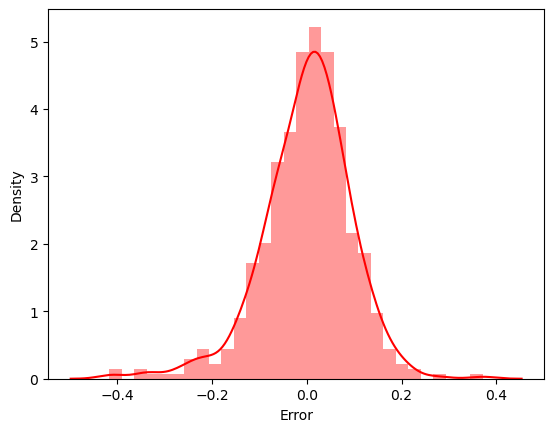

In [109]:
resi_train=y_train - y_train_pred
sns.distplot(resi_train, color='red')
plt.xlabel('Error')

The above distribution plot indicates that
- The error terms are normally distributed.
- The mean of the error term is centered at 0.

Text(0, 0.5, 'y_train_pred')

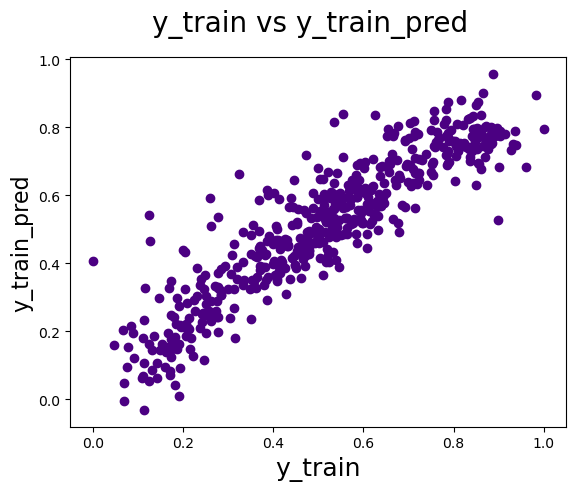

In [110]:
# Plotting y_train and y_train_pred to understand the spread
fig = plt.figure()
plt.scatter(y_train, y_train_pred, color='indigo')
fig.suptitle('y_train vs y_train_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_train', fontsize = 18)                          # X-label
plt.ylabel('y_train_pred', fontsize = 16)      

The above scatter plot indicates that:
- Predicted and actual values in training set follows linear regression.
- There is not much deviation with respect to the error terms.

Text(0, 0.5, 'cnt')

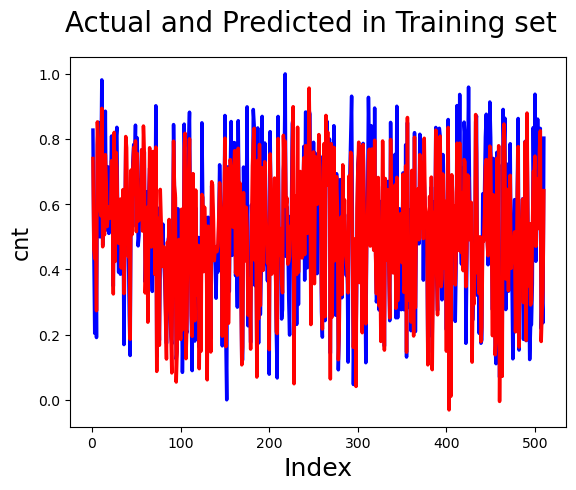

In [111]:
#Actual vs Predicted in Training dataset
c = [i for i in range(1,511,1)]
fig = plt.figure()
plt.plot(c,y_train, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_train_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted in Training set', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('cnt', fontsize=16)     

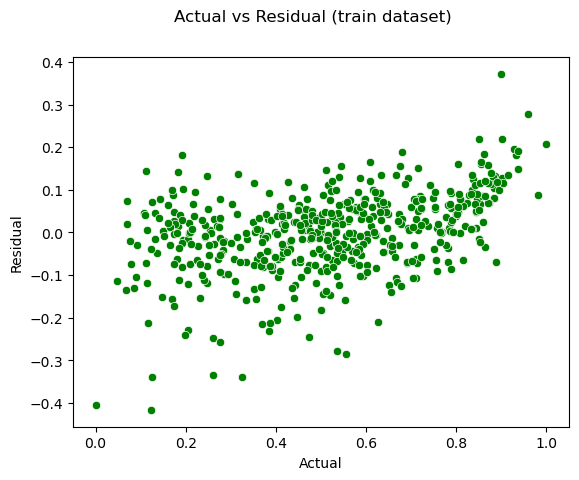

In [112]:
sns.scatterplot(x=y_train, y=resi_train, color='green')
plt.suptitle('Actual vs Residual (train dataset)') 
plt.xlabel('Actual')
plt.ylabel('Residual')
plt.show()

## The above scatter plot indicates that error terms doesn't follow any pattern and it is randomly distributed which means the model is best fit.

### R2 value of the model in training dataset

In [113]:
r2_train=r2_score(y_true = y_train, y_pred = y_train_pred)
r2_train

0.822071972531985

## Making Predictions in test dataset Using the Final Model

In [114]:
dftest.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,day_of_the_month,summer,fall,...,November,December,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Mist & Cloudy,Light Snow / Rain & Thunderstorm
184,0,1,0,29.793347,63.7917,5.459106,6043,4,0,1,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,32.082500,59.2083,7.625404,6211,20,1,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,1,19.270000,81.2917,13.250121,2659,27,0,0,...,0,0,0,0,0,1,0,0,1,0
221,0,0,1,31.433347,42.4167,13.417286,4780,10,0,1,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,29.315000,30.5000,19.583229,4968,2,1,0,...,0,0,0,0,0,1,0,0,0,0


##### Rescalling train data set 

In [115]:
num_vars = ['temp', 'hum', 'windspeed', 'cnt', 'day_of_the_month']
dftest[num_vars].head()

,temp,hum,windspeed,cnt,day_of_the_month
184,29.793347,63.7917,5.459106,6043,4
535,32.082500,59.2083,7.625404,6211,20
299,19.270000,81.2917,13.250121,2659,27
221,31.433347,42.4167,13.417286,4780,10
152,29.315000,30.5000,19.583229,4968,2


In [116]:
dftest[num_vars]=scaler.transform(dftest[num_vars])
dftest.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,day_of_the_month,summer,fall,...,November,December,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Mist & Cloudy,Light Snow / Rain & Thunderstorm
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0.100000,0,1,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0.633333,1,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,1,0.511964,0.837699,0.334206,0.303382,0.866667,0,0,...,0,0,0,0,0,1,0,0,1,0
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0.300000,0,1,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.314298,0.537414,0.569029,0.033333,1,0,...,0,0,0,0,0,1,0,0,0,0


In [117]:
dftest.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,day_of_the_month,summer,fall,...,November,December,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Mist & Cloudy,Light Snow / Rain & Thunderstorm
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.638221,0.313293,0.522154,0.500606,0.263636,0.245455,...,0.072727,0.086364,0.127273,0.168182,0.100000,0.163636,0.177273,0.118182,0.318182,0.027273
std,0.500809,0.187620,0.459303,0.233187,0.148694,0.159584,0.219163,0.285182,0.441609,0.431338,...,0.260281,0.281541,0.334038,0.374881,0.300684,0.370789,0.382770,0.323559,0.466833,0.163248
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595,0.258333,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678,0.483333,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750,0.766667,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### Dividing into X_test and y_test

In [118]:
y_test = dftest.pop('cnt')
X_test = dftest

In [119]:
y_test.head()

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: cnt, dtype: float64

In [120]:
X_test.head()

,yr,holiday,workingday,temp,hum,windspeed,day_of_the_month,summer,fall,winter,...,November,December,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Mist & Cloudy,Light Snow / Rain & Thunderstorm
184,0,1,0,0.831783,0.657364,0.084219,0.100000,0,1,0,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.901354,0.610133,0.153728,0.633333,1,0,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,1,0.511964,0.837699,0.334206,0.866667,0,0,1,...,0,0,0,0,0,1,0,0,1,0
221,0,0,1,0.881625,0.437098,0.339570,0.300000,0,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.314298,0.537414,0.033333,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [121]:
X_test_updated=X_test[predictor_var]
X_test_updated.head()

,yr,holiday,temp,summer,winter,August,September,Mist & Cloudy,Light Snow / Rain & Thunderstorm
184,0,1,0.831783,0,0,0,0,1,0
535,1,0,0.901354,1,0,0,0,0,0
299,0,0,0.511964,0,1,0,0,1,0
221,0,0,0.881625,0,0,1,0,0,0
152,0,0,0.817246,1,0,0,0,0,0


In [122]:
X_test_sm=sm.add_constant(X_test_updated)
X_test_sm.head()

,const,yr,holiday,temp,summer,winter,August,September,Mist & Cloudy,Light Snow / Rain & Thunderstorm
184,1.0,0,1,0.831783,0,0,0,0,1,0
535,1.0,1,0,0.901354,1,0,0,0,0,0
299,1.0,0,0,0.511964,0,1,0,0,1,0
221,1.0,0,0,0.881625,0,0,1,0,0,0
152,1.0,0,0,0.817246,1,0,0,0,0,0


In [123]:
y_test_pred=lr_model_10.predict(X_test_sm)

##### R2 value of the model with test dataset

In [124]:
r2_test=r2_score(y_true = y_test, y_pred = y_test_pred)
r2_test

0.7968261322866326

## Model Evaluation

#### Residual Analysis of the model on Test data set
The below distribution plot indicates,
- Even in the test data set the error terms are normally distributed with mean centered at 0.

Text(0.5, 0, 'Error')

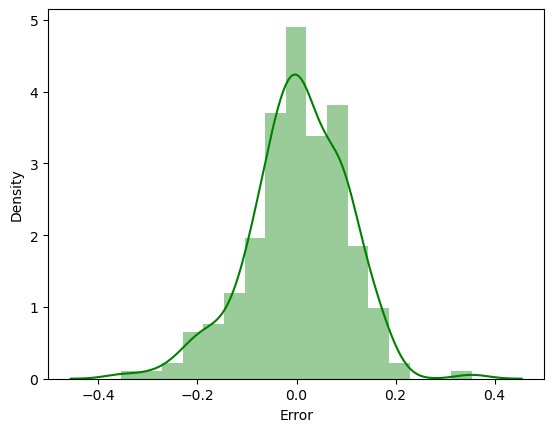

In [125]:
resi_test=y_test - y_test_pred
sns.distplot(resi_test, color='green')
plt.xlabel('Error')

Text(0, 0.5, 'y_test_pred')

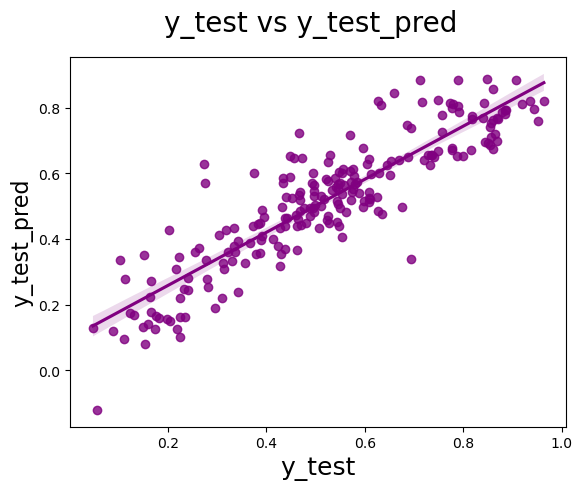

In [126]:
# Plotting y_train and y_train_pred to understand the spread
fig = plt.figure()
sns.regplot(x=y_test, y= y_test_pred, color='purple')
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)    # Plotting y_train and y_train_pred to understand the spread
 

Text(0, 0.5, 'cnt')

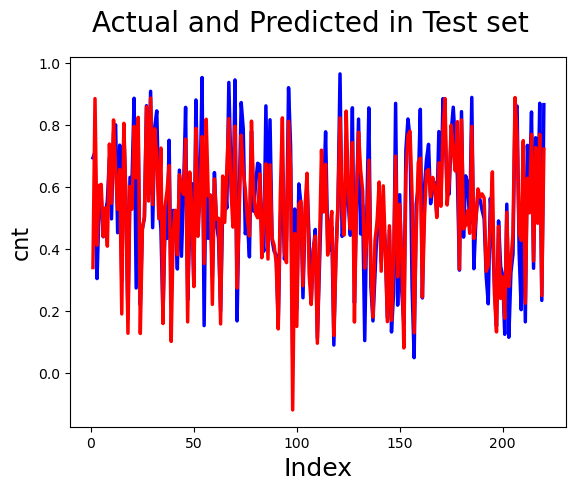

In [127]:
#Actual vs Predicted in Test dataset
c = [i for i in range(1,221,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_test_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted in Test set', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('cnt', fontsize=16)     

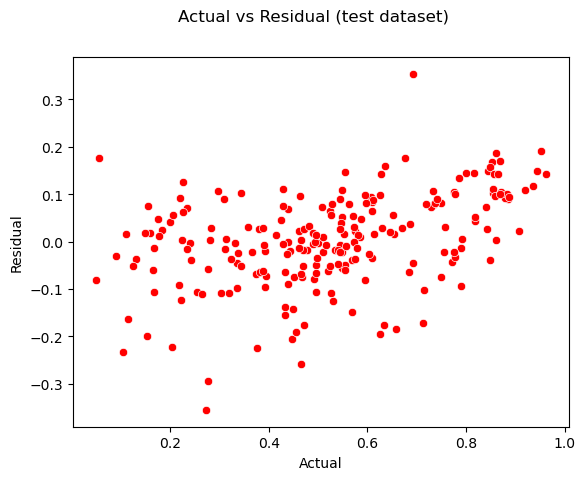

In [128]:
sns.scatterplot(x=y_test, y=resi_test, color='red')
plt.suptitle('Actual vs Residual (test dataset)') 
plt.xlabel('Actual')
plt.ylabel('Residual')
plt.show()

### The above scatter plot indicates that error terms doesn't follow any pattern and it is randomly distributed which means the model is best fit.

# ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Equation of the Best fit model

##### Co-efficients of constant and predictor variables of best fit model

In [129]:
lr_model_10.params

const                                 0.069762
yr                                    0.231336
holiday                              -0.099650
temp                                  0.539011
summer                                0.096809
winter                                0.144914
August                                0.058430
September                             0.123721
Mist & Cloudy                        -0.079552
 Light Snow / Rain & Thunderstorm    -0.296388
dtype: float64

## Count of total rental bikes (cnt):

##  *cnt* = (0.069762) + (0.231336) * *yr* - (0.099650) * *holiday* + (0.539011) * *temp* +  (0.096809) * *summer* + (0.144914) * *winter* + (0.058430) * *August* + (0.123721) * *September* - (0.079552) * *Mist & Cloudy* - (0.296388) * *Light Snow / Rain & Thunderstorm*




### Difference in R2 score of the model between training and test data-set

In [130]:
print('R2 score of the model in training dataset :',r2_train)
print('R2 score of the model in test dataset :',r2_test)
print('Difference :', r2_train - r2_test)

R2 score of the model in training dataset : 0.822071972531985
R2 score of the model in test dataset : 0.7968261322866326
Difference : 0.02524584024535248


## The difference between R2 score of train and test data-set is 0.025 which is negligible and this indicates that model has  generalized learning and there is no sign of overfitting.  This is a best fit model as it predicts 80% relationship between target and predictor variables.

### Conclusions from the Model


- The demand for Rental bikes increases when there is an increase in temperature.
- Year on Year the demand for rental bikes increases ie. 2018 < 2019.
- The demand for rental bikes is higher when the weather is clear and decreases it is cloudy, rainy/snow weather.
- The demand for rental bikes is high during the months August and September.
- The demand for bikes is on the higher side during the seasons summer and winter.